In [398]:
#import libraries
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [399]:
#load data
train_df = pd.read_csv(r"C:\Users\Prof Guru Joe\downloads\bigmart_train.csv")

In [400]:
test_df =  pd.read_csv(r"C:\Users\Prof Guru Joe\downloads\bigmart_test.csv")

In [401]:
test_df2 = test_df.copy()
train_df.shape, test_df.shape

((8523, 12), (5681, 11))

In [402]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [403]:
#view dataset
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [404]:
train_df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [405]:
print(train_df['Item_Fat_Content'].unique()) 
print(train_df['Item_Type'].unique())
print(train_df['Outlet_Identifier'].unique())
print(train_df['Outlet_Size'].unique())
print(train_df['Outlet_Type'].unique())
print(train_df['Outlet_Location_Type'].unique())#printing all the unique values of the categorical features

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['Medium' nan 'High' 'Small']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
['Tier 1' 'Tier 3' 'Tier 2']


In [406]:
#check for null values in the car dataset
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [407]:
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [408]:
#we need to quickly do some EDA to help us understand the nature of the dattaset

In [409]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputer.fit(test_df[['Item_Weight']])
test_df['Item_Weight'] = imputer.transform(test_df[['Item_Weight']]).ravel()

In [410]:
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [411]:
train_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [412]:
train_df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [413]:
train_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [414]:
test_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [415]:
train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean(), inplace=True)

train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode()[0], inplace=True)

In [416]:
train_df.isnull().sum() #deal with missing values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<AxesSubplot:>

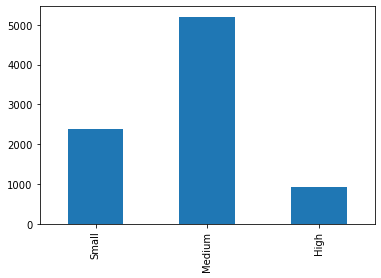

In [417]:
train_df['Outlet_Size'].value_counts().sort_index(ascending=False).plot(kind='bar')

<AxesSubplot:>

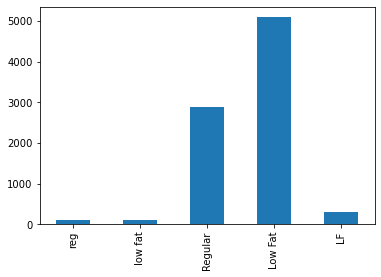

In [418]:
train_df['Item_Fat_Content'].value_counts().sort_index(ascending=False).plot(kind='bar')

<AxesSubplot:>

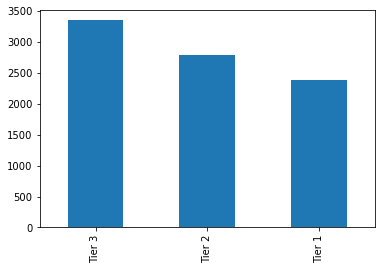

In [419]:
train_df['Outlet_Location_Type'].value_counts().sort_index(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

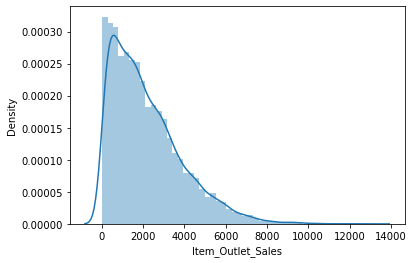

In [420]:
sns.distplot(train_df['Item_Outlet_Sales'])

In [421]:
#The sales are not normally distributed, right skewed

In [422]:
main_dataset = train_df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Outlet_Sales']]
#the required features in the model

In [423]:
main_dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [424]:
main_dataset['Current_Year'] = 2022 #creating the current year in order to get difference in years since sales differs for years

In [425]:
main_dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Current_Year
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2022
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2022
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,2022
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,2022
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2022


In [426]:
main_dataset['Num_Years'] = main_dataset['Current_Year'] - main_dataset['Outlet_Establishment_Year'] 
#number of years = current year - Outlet_Establishment_Year. this is an important feature for our prediction, 
#sales changes with years from the dataset

In [427]:
main_dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Current_Year,Num_Years
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,2022,23
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2022,13
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,2022,23
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,2022,24
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2022,35


In [428]:
main_dataset.drop(['Outlet_Establishment_Year'], axis=1,inplace=True)

In [429]:
main_dataset.drop(['Current_Year'], axis=1,inplace=True)

In [430]:
main_dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Num_Years
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,13
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,24
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,35


In [431]:
main_dataset.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Num_Years
Item_Weight,1.000000,-0.012049,0.024756,0.011550,0.008301
Item_Visibility,-0.012049,1.000000,-0.001315,-0.128625,0.074834
Item_MRP,0.024756,-0.001315,1.000000,0.567574,-0.005020
Item_Outlet_Sales,0.011550,-0.128625,0.567574,1.000000,0.049135
Num_Years,0.008301,0.074834,-0.005020,0.049135,1.000000


In [432]:
#visualizing the correlation as heatmap
import matplotlib.pyplot as plt
%matplotlib inline

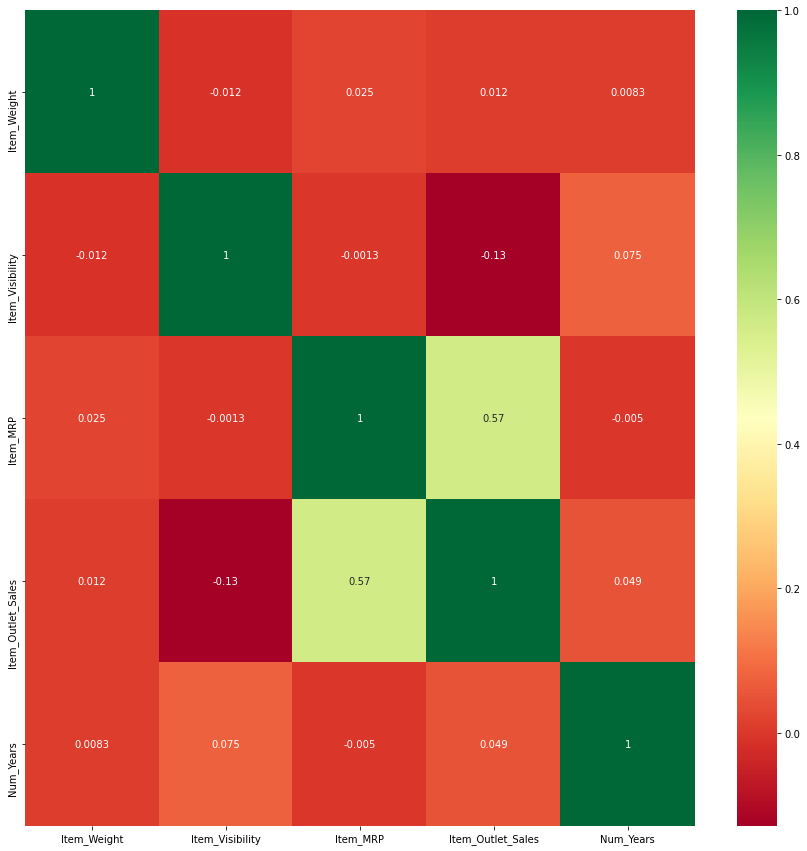

In [433]:
correl = main_dataset.corr()
corr_features = correl.index
plt.figure(figsize=(15,15))
#heatmap plot
p=sns.heatmap(main_dataset[corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Weight'>,
        <AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Weight'>,
        <AxesSubplot:xlabel='Item_MRP', ylabel='Item_Weight'>,
        <AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Weight'>],
       [<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Visibility'>,
        <AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Visibility'>,
        <AxesSubplot:xlabel='Item_MRP', ylabel='Item_Visibility'>,
        <AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>],
       [<AxesSubplot:xlabel='Item_Weight', ylabel='Item_MRP'>,
        <AxesSubplot:xlabel='Item_Visibility', ylabel='Item_MRP'>,
        <AxesSubplot:xlabel='Item_MRP', ylabel='Item_MRP'>,
        <AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>],
       [<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>,
        <AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>,
        <AxesSubplot:xlabel='Ite

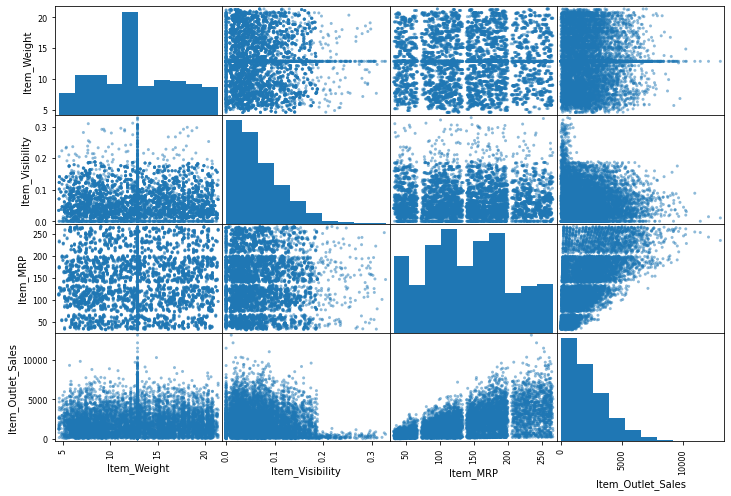

In [434]:
from pandas.plotting import scatter_matrix
features_df = ['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']
scatter_matrix(main_dataset[features_df], figsize=(12,8))

In [435]:
main_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Identifier     8523 non-null   object 
 6   Outlet_Size           8523 non-null   object 
 7   Outlet_Location_Type  8523 non-null   object 
 8   Outlet_Type           8523 non-null   object 
 9   Item_Outlet_Sales     8523 non-null   float64
 10  Num_Years             8523 non-null   int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [436]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
main_dataset["Outlet_Type"] = ord_enc.fit_transform(main_dataset[["Outlet_Type"]])
main_dataset['Outlet_Location_Type'] =ord_enc.fit_transform(main_dataset[["Outlet_Location_Type"]])
main_dataset['Outlet_Size'] =ord_enc.fit_transform(main_dataset[["Outlet_Size"]])
main_dataset['Item_Fat_Content'] =ord_enc.fit_transform(main_dataset[["Item_Fat_Content"]])
main_dataset['Item_Type'] =ord_enc.fit_transform(main_dataset[["Item_Type"]])
main_dataset['Item_Weight'] =ord_enc.fit_transform(main_dataset[["Item_Weight"]])

In [437]:
main_dataset.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Num_Years
0,284.0,1.0,0.016047,4.0,249.8092,OUT049,1.0,0.0,1.0,3735.1380,23
1,57.0,2.0,0.019278,14.0,48.2692,OUT018,1.0,2.0,2.0,443.4228,13
2,376.0,1.0,0.016760,10.0,141.6180,OUT049,1.0,0.0,1.0,2097.2700,23
3,393.0,2.0,0.000000,6.0,182.0950,OUT010,1.0,2.0,0.0,732.3800,24
4,265.0,1.0,0.000000,9.0,53.8614,OUT013,0.0,2.0,1.0,994.7052,35


In [438]:
y = main_dataset.iloc[:,9] #this selects the Item_Outlet_Sales as the dependent variable

In [439]:
#view my dependent variable
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [440]:
col_list = list(main_dataset)

In [441]:
col_list[0], col_list[9] = col_list[9], col_list[0]

In [442]:
main_dataset.columns = col_list

In [443]:
main_dataset

,Item_Outlet_Sales,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Num_Years
0,284.0,1.0,0.016047,4.0,249.8092,OUT049,1.0,0.0,1.0,3735.1380,23
1,57.0,2.0,0.019278,14.0,48.2692,OUT018,1.0,2.0,2.0,443.4228,13
2,376.0,1.0,0.016760,10.0,141.6180,OUT049,1.0,0.0,1.0,2097.2700,23
3,393.0,2.0,0.000000,6.0,182.0950,OUT010,1.0,2.0,0.0,732.3800,24
4,265.0,1.0,0.000000,9.0,53.8614,OUT013,0.0,2.0,1.0,994.7052,35
...,...,...,...,...,...,...,...,...,...,...,...
8518,125.0,1.0,0.056783,13.0,214.5218,OUT013,0.0,2.0,1.0,2778.3834,35
8519,233.0,2.0,0.046982,0.0,108.1570,OUT045,1.0,1.0,1.0,549.2850,20
8520,299.0,1.0,0.035186,8.0,85.1224,OUT035,2.0,1.0,1.0,1193.1136,18
8521,149.0,2.0,0.145221,13.0,103.1332,OUT018,1.0,2.0,2.0,1845.5976,13


In [444]:
X =main_dataset.iloc[:,1:] 

In [445]:
X.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Num_Years
0,1.0,0.016047,4.0,249.8092,OUT049,1.0,0.0,1.0,3735.1380,23
1,2.0,0.019278,14.0,48.2692,OUT018,1.0,2.0,2.0,443.4228,13
2,1.0,0.016760,10.0,141.6180,OUT049,1.0,0.0,1.0,2097.2700,23
3,2.0,0.000000,6.0,182.0950,OUT010,1.0,2.0,0.0,732.3800,24
4,1.0,0.000000,9.0,53.8614,OUT013,0.0,2.0,1.0,994.7052,35


In [446]:
X = X.drop(['Outlet_Identifier'],axis =1)

In [447]:
X.head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Num_Years
0,1.0,0.016047,4.0,249.8092,1.0,0.0,1.0,3735.1380,23
1,2.0,0.019278,14.0,48.2692,1.0,2.0,2.0,443.4228,13
2,1.0,0.016760,10.0,141.6180,1.0,0.0,1.0,2097.2700,23
3,2.0,0.000000,6.0,182.0950,1.0,2.0,0.0,732.3800,24
4,1.0,0.000000,9.0,53.8614,0.0,2.0,1.0,994.7052,35


In [448]:
from sklearn.model_selection import train_test_split

In [449]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=55)

In [450]:
#using linear regression
from sklearn.linear_model import LinearRegression

In [451]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [452]:
X_train

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight,Num_Years
4980,2.0,0.038746,13.0,143.8102,1.0,1.0,1.0,4811.7366,15
3757,1.0,0.020597,1.0,200.0742,1.0,2.0,3.0,8958.3390,37
2897,1.0,0.034370,0.0,43.7086,2.0,0.0,1.0,892.1720,25
5253,1.0,0.082121,1.0,177.4370,1.0,2.0,2.0,5645.9840,13
3109,1.0,0.043322,15.0,39.6164,1.0,1.0,1.0,1004.0264,20
...,...,...,...,...,...,...,...,...,...
2595,1.0,0.018632,3.0,82.9908,2.0,0.0,0.0,503.3448,37
5488,2.0,0.106752,0.0,181.4634,2.0,0.0,1.0,1090.5804,25
6198,2.0,0.014201,13.0,187.1872,0.0,2.0,1.0,3214.4824,35
968,1.0,0.000000,8.0,120.6440,2.0,1.0,1.0,1917.5040,18


In [453]:
X_train.shape

(6818, 9)

In [454]:
y_pred= regressor.predict(X_test)

In [455]:
print(y_pred )

[3259.7568 1120.5414 6196.6006 ... 6478.234  1458.102  4180.5582]


In [456]:
print(regressor.score(X_train, y_train))
print(regressor.score(X_test, y_test))

1.0
1.0


In [457]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

R squared value:  1.0
Root Mean Squared Error :  1.839661756994906e-12
Mean Absolute Error :  1.407841455014361e-12


In [458]:
# R2 of 1 indicates that the regression predictions perfectly fit the data which is a confirmation of the test and training accuracy.

In [459]:
#using randomforest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [460]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [461]:
#randomized search cv
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#nos. of features to consider at every split
max_features = ['auto', 'sqrt']
#max nos. of levels in tree
max_depth = [int(x) for x in np.linspace(6,30,num=6)]
#min nos. of samples required to split a node
min_samples_split = [2,5,10,15,100]
#min nos. of required at each leaf node
min_samples_leaf = [1,2,5,10]

In [462]:
#to find the best estimated parameters
from sklearn.model_selection import RandomizedSearchCV

In [463]:
#create random grid to see the various parameters that has been taken
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
              'max_depth':max_depth,
             'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [6, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [464]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [466]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  21.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  20.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  20.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  20.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  20.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  28.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 19.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [467]:
y_pred = rf_random.predict(X_test)
y_pred

array([3259.20783219, 1119.86572736, 6198.97502832, ..., 6467.07471217,
       1457.09990713, 4173.44186492])

In [468]:
import warnings

In [469]:
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

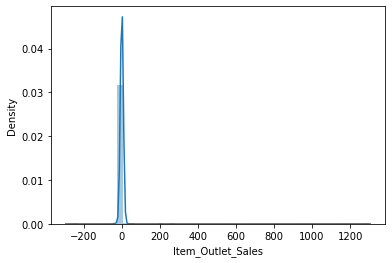

In [470]:
sns.distplot(y_test-y_pred) #y_test is actual value 

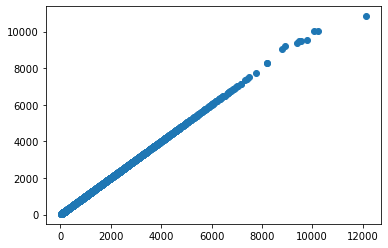

In [471]:
plt.scatter(y_test,y_pred)

In [472]:
#this is also very good model, as shown by the graph in line 246 of difference between actual y values and the predicted y values.
#the scatter plot is linearly okay.

In [485]:
#using Ridge regressor

In [486]:
from sklearn.linear_model import Ridge

In [487]:
RLR = Ridge().fit(X_train, y_train)

In [488]:
y_pred= RLR.predict(X_test)

In [489]:
print(y_pred )

[3259.75679991 1120.54140009 6196.60059976 ... 6478.23399977 1458.10199992
 4180.55819984]


In [490]:
print(RLR.score(X_train, y_train))
print(RLR.score(X_test, y_test))

1.0
1.0


In [491]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

R squared value:  1.0
Root Mean Squared Error :  1.246075949224756e-07
Mean Absolute Error :  9.383585513590352e-08
